In [4]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim

INFO: Loading help data...


# Ejemplo Hector

In [64]:
#Voy a crear una matriz grandota donde la primer entrada es el tiempo, ustede háganlo más eficiente sin usar tanta memoria
Lx=20 #Posiciones en x
Ly=20 #Posiciones en y
N=20 #Tiempos
P=zeros(N,Lx,Ly)
P[1,Lx/2,Ly/2]=1 #Empezamos en la casilla (1,1)

for i in 2:N #Loop tiempo
    for j in 1:Lx #Loop en x
        for k in 1:Ly #Loop en y
            if j==1
                if k==1
                    P[i,j,k]=1/4*(P[i-1,j+1,k]+P[i-1,j,k+1])
                elseif k==Ly
                    P[i,j,k]=1/4*(P[i-1,j,k-1]+P[i-1,j+1,k])
                else
                    P[i,j,k]=1/4*(P[i-1,j,k-1]+P[i-1,j+1,k]+P[i-1,j,k+1])
                end
            elseif j==Lx
                if k==1
                    P[i,j,k]=1/4*(P[i-1,j-1,k]+P[i-1,j,k+1])
                elseif k==Ly
                    P[i,j,k]=1/4*(P[i-1,j,k-1]+P[i-1,j-1,k])
                else
                    P[i,j,k]=1/4*(P[i-1,j,k-1]+P[i-1,j-1,k]+P[i-1,j,k+1])
                end
            else
                if k==1
                    P[i,j,k]=1/4*(P[i-1,j-1,k]+P[i-1,j+1,k]+P[i-1,j,k+1])
                elseif k==Ly
                    P[i,j,k]=1/4*(P[i-1,j-1,k]+P[i-1,j,k-1]+P[i-1,j+1,k])
                else
                    P[i,j,k]=1/4*(P[i-1,j-1,k]+P[i-1,j,k-1]+P[i-1,j+1,k]+P[i-1,j,k+1])
                end
            end
        end
    end
end          

In [65]:
#Crear un arreglo de la matriz en cada tiempo
ani=Any[]
for k in 1:20
    push!(ani,squeeze(P[k,:,:],1))
end

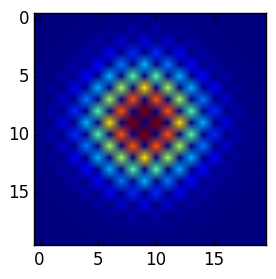

In [66]:
fig=figure(figsize=(3,3))
ims = [[imshow(ani[i])] for i=1:20] ;

In [71]:
fin = anim.ArtistAnimation(fig, ims, interval=100, blit=true) 
fin[:save]("caminante2D.mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,"caminante2D.mp4")),"""" type="video/mp4"></video>"""))

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAARhhtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0NCByMjUzMyBjOGE3NzNlIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAGRmWIhAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gGngrscUaaUOvBJCS5mZ7FkRYHmAH+PF+W21lmptwNcjfro7lzbB9usiGkN7w+IwSGpqW9XkUfGIxnmlwVWA0P6m/vhhNYm4hyxrYON/D6XqKTzrj/A/KMhOeONh6rNQm/26Wbsom6x5WbqW92OAtTokJ5AlIaZY4b/bmQj+tWh4ppNPXlb3kuw5/jJImqeZ+SyLy3E7fFcuj5hFFDHdJ0xqaItRin2k6J6AQ5q+SzQrGre4rL7JVHaUTo3a3JTvKK1X1FdbhTkROQODeR1Bc9yeBJOb7499qbM1rPusKi8L68yedjU4Fn3zSbsaAkz6qB/XnZN7erlzGNbcAAD5p+ts2w/H9iDadnijPHEB5oLLC6yuuSVZ4fxvxpYkI5l0A3wYqwYwel7SlsmQF9VBa8iWmLweW4Kh880fPnayWdF8kpvk2BsV3AzifVZwvMEL5fwSFpGxZzl2PFHH3SFMdNKKImZnfVvZ0W5JWRmUssqxXBXvfwEHjvOQ253/fXKMQtr0RWqv6jeoy14K9QxtZ2C1TfbLN8R54WrWjDqSzv/8s74UKCdVa0ukTOrCgfM2XRN3Sl8ulNDnZdp2tFrB4PIBqe3qtVGj7ZJaHjDXdl91ZbRj5duZHioOQ8AFiQ1w6nktdwE1n0ZiR0EdjRpVg2X8Gb7K2p0AWH4KyzjYKLJTEJ+fUbyV/DYe9drWNU+IPMuNn41WYysUMs5ptDlt/3EmnjXygGfTxpizPScd5oJgzmgNejo5t7M9LZt3giPvyIwDxTu0jDw9fPm2xGdkzpzvjMhlDvRIUKJhV0amZhEexVmXHLZ/nGKlR3V2WH8dFoSZyou3yntIqRP9ihfAE5mVD2ooChlAGvZzNpMB8gcNMmx0bVwnFxQ//e7ZSf91ocqPpRhP0/dnb6VjFIGr++OmFnPlGH5nFock2Wcee0Zr61CES95+03L+3ElwfwjrZL3Jejo9RGPsnBkW1vIFJHLQAjWHLpuctsTv6JnqfQDbxXilMQQQ5MsTxL4gEfEvqDu85R+soQnvHNCpkKDXPsdwwwMFUt9mOb54sq0eC0fiD2WcYdp7uX+KBRQm2RK8n+ZGvWGIE4mnWImoUOP9f26T7+i0fZsqwED+BwCBBZkn47ompJ9rr3sHBlPnOEJO3LYF9sN/jvGPzjeIwTwKc8I6znMX6OOz6V9/6FgY8x1FS0heBL898ngGj5GKrOt5ZllTPQ29K0XvpwVGwDhmlI100gv330sOMUF29DOfQquueNC5X7AcED4+odwtc3nv9a6Q6+nE5g4uY4peotixlc6jWmTxV+Z8ytZp1ApIvNQW8q+cka0axYW6Jh5AlT4BIqAr9YXG6QtpheWjOGS091rTPuAu29FbY/clyH4sAiy1957Ab8FxEbN3t2w8tk8q7OYwx+qkHtWBZt6U7kfpxftJKOtxE1X6gQ4rNvgl5E82oAEVDaaGKIHpQGGtWP062/mprltDyLRp/EbZy1xdUXReSAFSksWDfPhX+PoqEvbpa2tpbsyFQE0984ClwZJZe+dbc7sK2wkQDUOC+DosrUigJGuB6EZ3kDRJP+k73CgMGf0kDDm0DkEI3S7UGLnmLLCVcwG/RLF5zdBFhUY6HHdL0X9SlW94SvpnnRcKqjRKmERniBafR3ebxXrKcAYCKCIyafbd44yz3nWDKctxwiDu4ujypiaZfr8LKc7hodiCO1OoOkdlp5/ZJ6HJ1qVFnHuzohDn5rESkaeqg8JK0a8PaMWW3o9ObPaLnDPEPCqqaNEH7mLp9sL7CC7XIsVjunjQ0v8Tmo17obf7Vef4eqTlz7Ute68kfG9VnLE6V+bKS6HBDjkfAjxR/7XKNbXh0KIvrVowg2oYiuVwx6UAULT7A/jCXaDZrAxrNRYN/9aDQCiBSLVBu26RXfYNsNdt4Rhclfl9y+zdt3Y8D747ZuFbD2sh+XXXHknXR4PuvAVF+eLABJU8Pk9bEQxGagmBWSkLfQJjNh/IH2fvyAn2Tm6F7KusUEnyOxGTubL/VN2LNvfIvfhqw88ZyV6uojLCvlP2WVdq0HwnqO2MMHeWvJZaZy4jXP1avB6551v6hYRrKylEXfakAAAR4QZokbEEf/rUqgAjPX/gggK2RX09tPlua2DBno8Zs23cz8EYtyqfMCqjo3qgHE8xEh9rOPF9m/UFXpeCJBo5Hs3DcsCtw6n2tCuWXuXY1PjH8Lgd2reUGSiniLhwVmOPRo22IIK26a5aMzaAUFCPLrmqfenZ17cBnmE9L5I5xAN093Pylqm2gfEYjJrJagPfoqGC+O1KdgARxT1cRWH52omAj2P9Yw4i7/TQtmS5nTrT0VEuZeNjlS3m+yfrWUXW5x2CGTkncd7VlSCN8l0CXgB21VuOdxkbRbloCu6F+jIHH9hw/KygOXWLozRJsdxL015/Ptp3Brj/o7vnpw/eClvDpD5dKPERovj8/lWkoaUNFAAu2c3ee3+Vwcd8Qa5sHakom2xTGtM6RClordvqnvrt8Ul2B52Qt3accA7Xrxt4yB1Z5Xwx1u3WYAfjmpCbDKz/WNQMUUbeGVQ53ClCKPXOGYN2BGwEJjdbKZplW3hvOOFjgGF87A7/n7TVHjU87OpD1/ryYtg2cefvRDX70Epatix/bBi9XCome2o+D3eMvwhz5bAVa60yCAVOa9anF9CiWmjeDe709iPfgS4WB+QCVez7TSqJWnSuTicidEBJQb7qgoKxBQKapqgn8+6ZJgfIEo0hLoSYR8LLe7WCxzEHlkUj19RWBnK/HpV+dDKWWs3dn4VRsVpdQDr6SJyU24Z1WRKa6+vI3+bvSL/WD0cBCNckmKRX6YVmDmSLQ76pb1y2XorUHKXqD+/mjArVQ1cF/cSGbJxC7xt4JiCovLCn13lQm7sYKeTq80mY1qvk3Gmj2St/HcHQ1I5/

# Histeresis

In [5]:
using Histeresis

In [23]:
L = 20
R = 2
espin = -1
H_set = 15

m = edo_inicial(L,R,espin)

edos = microEstados_aumenta_H!(m,H_set,espin) ;

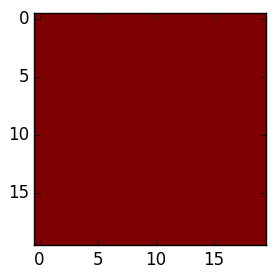

In [29]:
fig=figure(figsize=(3,3))
cuadros = [[imshow(edos[i], interpolation="none", vmin=-1, vmax=1)] for i=1:length(edos)] ;

In [30]:
fin = anim.ArtistAnimation(fig, cuadros, interval=200, blit=true) 
fin[:save]("histeresis.mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,"histeresis.mp4")),"""" type="video/mp4"></video>"""))

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAANYZtZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0NCByMjUzMyBjOGE3NzNlIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAcfZYiEABT//vfHT8Cm6Plmy51FPSEwitj6SCi9WOzQMnUAdsKk98DATEX+DaFG0dVAG6hiFxAE06Ht8ZltGW5nfJj5NQgysAEpyTfHXSKPsWiEznIEzE0zv760LptUugLQvIhZfrN36QhXh9ozpCQIxM5XwLTlh/rZUz3ZBOriefQl/T5QdW72vIsOgGEoEnUzwPZjzfwvfhSwCcw5+n5R1vqR/XIMsSdxInnk/X9nxvev8nJzvHXiLCUDAd0xADU1+yX7OIEcgCaAUeMvzPJCzPB3ESIW85RrFtbgdPNEI6m74SAxzqpLWoUdt2JKnaaCEiLuFFpXWsvw7PfyzlCFvnOZrixHCTxuqHFPwUXiLsT5kzXhduPFnoV4+Y7GCUSaPwdX7f6zNoRg8HCOcxjiUK1VgpN75ycf7Gbrhirk2w67IVHn+GkXSO1c5ztfduQNxABugjTpfJZ5A+56ZAQKdU0rH1YatIPsJjumoogyr/VONFVeHi/Z7/6Wrzh+rlxNnODngPEzmnhPer6IpQ8A+eeKABdkQ5Bl7JrAGdQxFG5/0PNRhrQjhKZRpW16YWsnns895pXUSh49hOH7tlnZL9SM6Hl42q7C6F1pnKnw5yPt8Y+xww1tA2pkfGcRl20v76Wl0a8C1LBb5IOHmXcusb5Q3OXJ+bSH62p5BZnrDEe4v783EGiAveWiP3yv0uO1baqY6qJ4RZHxj2yT1eUkQRu60Wxo+Yg7RrgAVB5VIP4uL3yRV2qaYkELhSYBSkd7h5vrbtdCklecJBu1j291a2wn6eFZ3YIXy0qx0oxJ8ae8Ijbwcw4UPRyCm4zN6iuwYDfR1qhPNYlW3ra/8ThuouSLt84weD4sAAMVll0C7lYYu/N0P/qTA5WtrfW4DkamYtTYbcKpfzxMEJ1F50u1WCpEbzS9ZXjPuiWEG1aHi4Gs3aZx1Z76ie7lLxq/+HrmnTpHxPgejuMhaCbhhaeavWdRVN1WZVfMFdqlv/y3gKMYu2e3jomlpZkcMP6V2wL+dVdQhO0C2mxYH1Utzrvd8kfQGp5T3dlQKSrKLT37+tgQrRq+J7uywGIJZa8VtvTCdSJ9dZ1JhojsoAprWN9C4zY/dDvNK9KVvNh+gK6WGUV+owc5n/Xqu8jpC+433pKCG9ng2ezV75HYEmZypniU2eLwgzjxiDTjZHVHSG7yBHNDUPCSNIFP+1IsWxWFFFAFDcmmEk37vCZ12JNKxkFyik4QdJ2L+fBWZlA1CeMeCqGIvqjgtZdG79Xtzw565rNDO3Mgopal2LPv/QmmSDu/TUtdWFUxzNkMIf9sLcWItvXc603aMfr1aeMugq7H484ySjTiJXWAjZ4hFAi2WKcAXsN7ocWVyZtZy3f6ECdu0egWcE350ejAffMomWZ/MGAOVJFJJ77ecu5xfvHi3kREhur1pNV2hBYEqn87P53EBvZ8uL+LWSBv/oLw27j1EG6SAJ3FQZsZc5BvPC3NaxhvbhIyjsPVwc0hpnVNJpH1A2IlAotCami4iFDzP7me4fL6NvWIqGgFwhXshggTrJ3tdN0x3YyIJ0VzGMisLrUQO7XHz4TNiQy8J3q/mOhy/YkQJdZKXJbe7vIY3mnmP6KIm3SGSYDRhuGL91SpaxXPSGRRAaMUfzHBKXqPFefX6Zbs7YHl56LE5z+lhZslmOJF5amXcl9e2KT1sZ6s0ig+l7Yh15puTtiSEPVLXjCmFZl0JFUEJ8a/qExo07h8O9bVZnfjWsO4w10i9B1t3r3/s3a9yWQOxmR/Yl58pUeN11pUiXUB2tSFRStVy+bUXImaCOQkQteYdrLcyj57QFfB424F6NalkkmhgpjMzHpnYhSqcoo0/mYzgExpflpiO5v0s/N0h47nMn6VtXzwo48J8oQLtHAmtyxSfuXXO1YDSMlfo9HxjcFqWMGv8E+Y2yHeQW5h6jbhPeJ9crMcIXPh12xKRDBvOYqLCyNy4McWWhEilV770JP2YOa6zuGlhfCS+w5pyXV7QujNoEBqNmbmRsqCAakidbpqmX3n9/skUMJ56Ts1DMxAk8ISGU+ZOPqpnq8CqLAu10LNAi6d6qBzqbV6bBtB7J75+lyfzBVRxh1VWB33oQJ5of5uyOWnkcQnf6m8oQ6sIvjo90Enwz7hN4vzKxIoBLmYRJ83koNJVq+zinyGpsve6K2e9nHPed1cawVFTsEBx3QGV/vVha9Vl4KUfSkAsJo4nnNbiHZSdLbWqEboPz0+Ubjqjn4uzWaaw/EVNA2UFEmH9+zpGW86s2ZISsWPY3VZYd4lGvHicM8HwCvweZwH8l+90S6QIBAsLnDgAo/Np2LGx6mTw1B5HlhCN+gaRvV/NdfQE+BHKTKe04XjZG58IUrxOGJPyU2faqjnBkfIdPTWOUE8Fy/VvlxyA703DHfcrFdyS3cs60sAAAHKQZokbEFP/taMsBafLGMRhemk7hsx37/8L/SAAa/4Luqc+q/aDSMX8By7YPcYJiFGC8Py3o09gan5Kl6csWeukjqJvX///keCHtKGpJe39owj0kTrO+SuemnJy8VZnv/rtdK51bqHzOalcjRr1bLuULx3V9dhj1+5hVQOzYFzkifpygIewbWuFe0PdeIaxFYEs4PgicLC+M96CjboLvi+XM9onXvNcBWj+3a8tMWkc/w5BhdY1yydGeUywYuEaEJwu6Ap+kVLBvCSQM+PwtiF0g2LrFI3W5+PTYVtHfh7KavlJf0886eK+a5fZb7KGjBKc6y5AYCLEFAYqoUkBKw3tyAOJ89RhYXAk+eS9VQMdthNXAq2H7E/7JKyRtt3LScgmgIUsxpjeaLNAHwx6mRuEw0mbhz0+Ak+6AWWw1qAX+M6l5l9sizXng+wHorktYQgaRwQyatgUtcLAg81kmlYzsqwreccMG1gUht7jUSQj5z1wGrjxMQdPSQ2p1CPnBtSb6Yj0jgsoPiKAg/ypmC0HpqHTKG